# `gradelib` demo

The below demonstrates how to use `gradelib`, as well as the features available for overvieweing the grade distribution in a Jupyter notebook.

In [1]:
import gradelib
from gradelib.policies import exceptions, lates, drops, attempts

from IPython.display import Image

# combine grades from Gradescope and Canvas
gb = gradelib.combine_gradebooks(
    [
        gradelib.io.gradescope.read("./gradescope.csv"),
        gradelib.io.canvas.read("./canvas.csv"),
    ]
)

HOMEWORKS = gb.assignments.starting_with("home")
LABS = gb.assignments.starting_with("lab")

# manage grading exceptions
exceptions.make_exceptions(
    gb,
    "Justin",
    [
        exceptions.Drop("lab 01", reason="illness"),
        exceptions.Replace("homework 01", with_="homework 02", reason="added late"),
    ],
)

# take each student's best attempt on the midterms
attempts.take_best(
    gb,
    {
        "midterm 01 with redemption": ["midterm 01", "midterm 01 redemption"],
        "midterm 02 with redemption": ["midterm 02", "midterm 02 redemption"],
    },
    remove=False,
)

# group the assignments and determine their weight in the overall score calculation
gb.grading_groups = {
    "homeworks": (HOMEWORKS, 0.25),
    "labs": (LABS, 0.25),
    "midterm 01 with redemption": 0.25,
    "midterm 02 with redemption": 0.25,
}

# apply grading policies
lates.penalize(gb, policy=lates.Forgive(3), within=HOMEWORKS + LABS)
drops.drop_most_favorable(gb, 1, within=HOMEWORKS)
drops.drop_most_favorable(gb, 1, within=LABS)

# find robust letter grade cutoffs by clustering grades
gb.scale = gradelib.scales.find_robust_scale(gb.overall_score)

In [30]:
gradelib.overview(gb)

Letter,A+,A,A-,B+,B,B-,C+,C,C-,D,F
Frequency,0,1,0,1,1,1,0,0,0,0,0


Loading BokehJS ...

,Frequency
Number of Lates,
1,1
2,2
6,1


,homeworks,labs,midterm 01 with redemption,midterm 02 with redemption,overall score,letter,rank,percentile
<Fitzgerald Zelda>,0.991071,1.000000,0.920000,0.833333,0.936101,A,1,1.00
<Obama Barack>,0.846774,1.000000,0.880000,0.800000,0.881694,B+,2,0.75
<Eldridge Justin>,0.793491,0.914062,0.720000,1.000000,0.856888,B,3,0.50
<Else Someone>,0.794643,0.920290,0.645833,0.933333,0.823525,B-,4,0.25


MovieWriter ffmpeg unavailable; using Pillow instead.


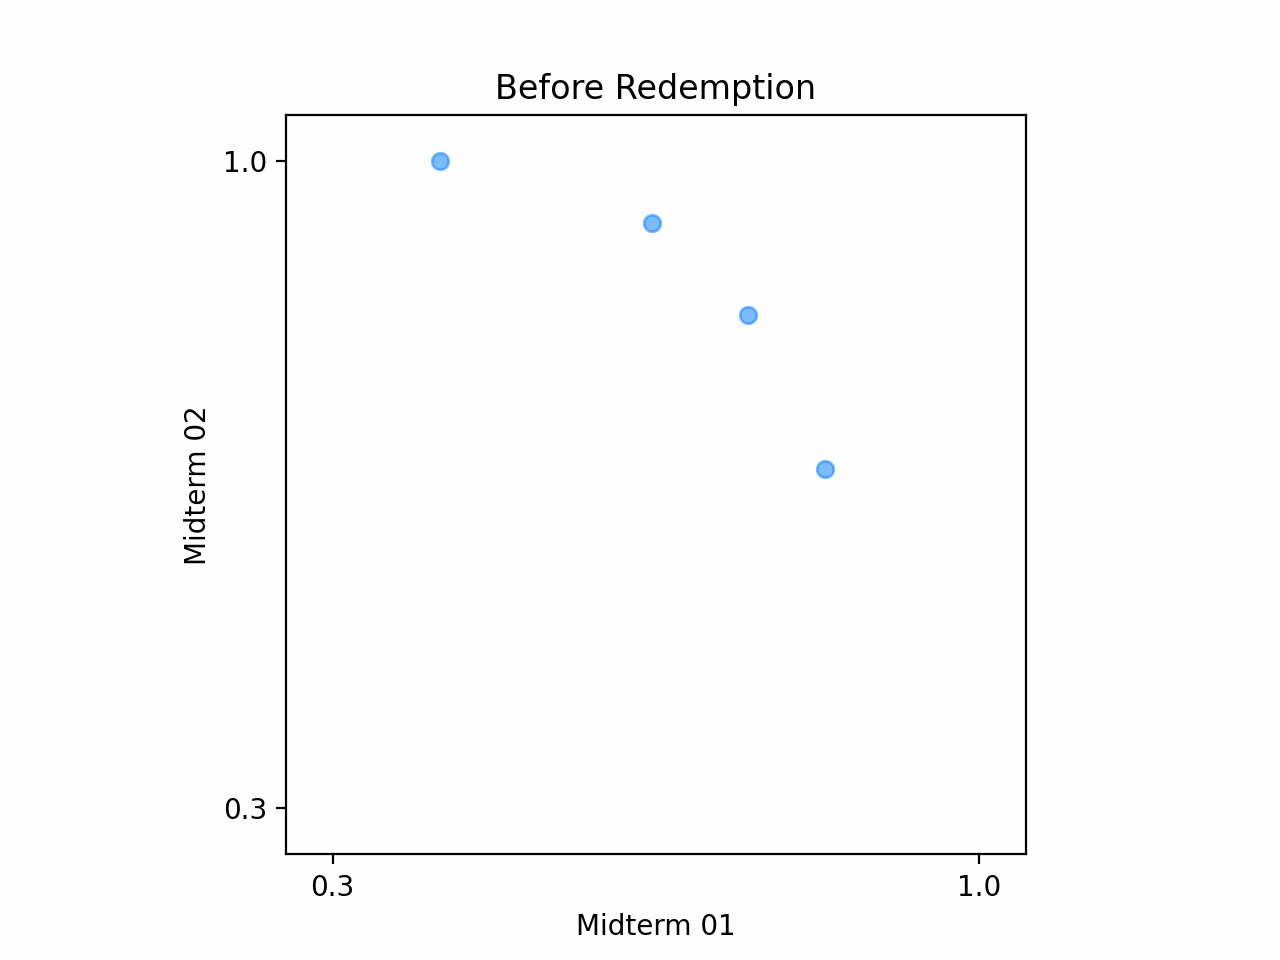

<Figure size 400x400 with 0 Axes>

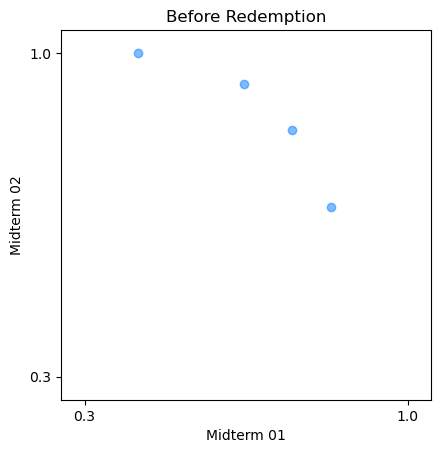

In [63]:
gradelib.plot.grade_shift_animation_2d(
    (
        (gb.score["midterm 01"], gb.score["midterm 01 with redemption"]),
        (gb.score["midterm 02"], gb.score["midterm 02 with redemption"]),
    ),
    title=("Before Redemption", "After Redemption"),
    xlabel=("Midterm 01", "Midterm 01 with Redemption"),
    ylabel=("Midterm 02", "Midterm 02 with Redemption"),
    filepath="./animation.gif",
)

Image("./animation.gif")